In [20]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [21]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing_df = pd.read_csv('../../data/boston_housing/housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [22]:
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [23]:
from sklearn import preprocessing

# medv is response variable
min_max_scaler = preprocessing.MinMaxScaler()
target_variables = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']

x = housing_df.loc[:, target_variables]
y = housing_df['MEDV']

x = pd.DataFrame(data = min_max_scaler.fit_transform(x), columns=target_variables)

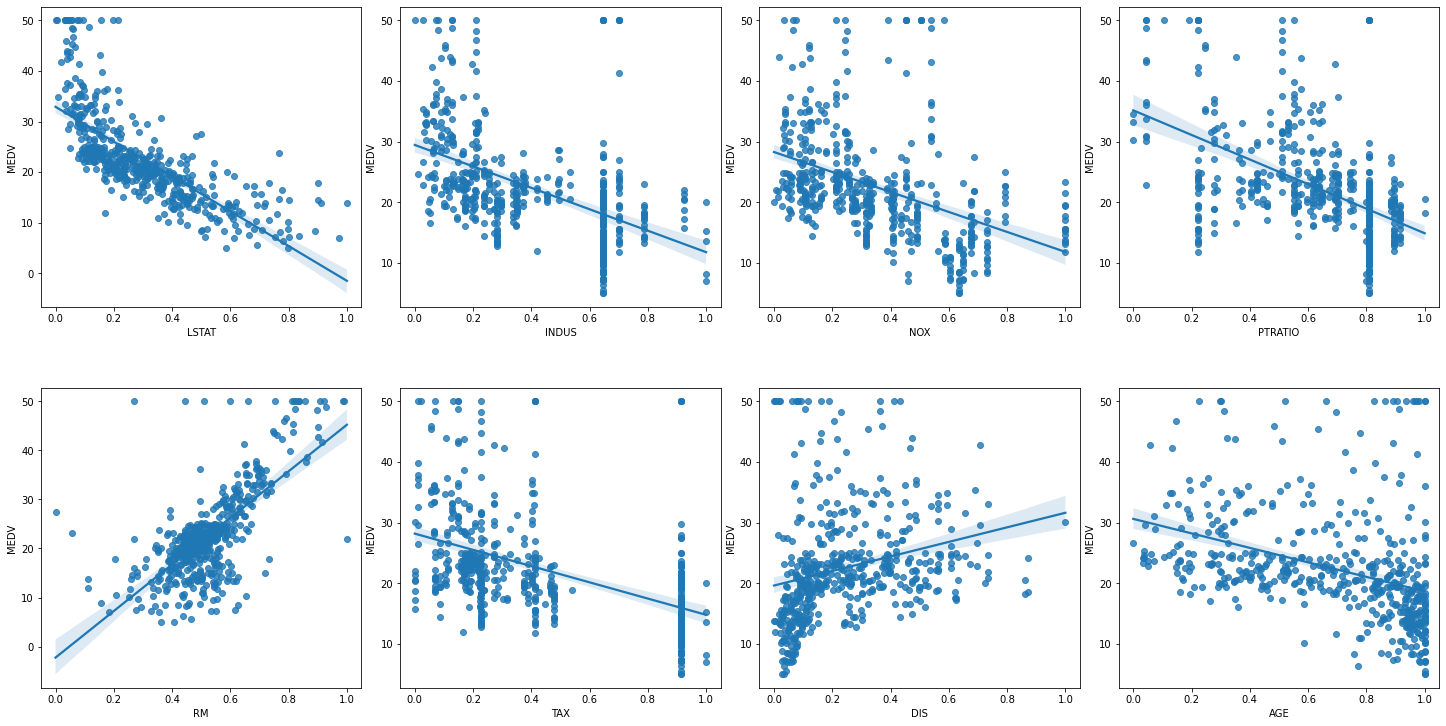

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(target_variables):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [25]:
x

,LSTAT,INDUS,NOX,PTRATIO,RM,TAX,DIS,AGE
0,0.089680,0.067815,0.314815,0.287234,0.577505,0.208015,0.269203,0.641607
1,0.204470,0.242302,0.172840,0.553191,0.547998,0.104962,0.348962,0.782698
2,0.063466,0.242302,0.172840,0.553191,0.694386,0.104962,0.348962,0.599382
3,0.033389,0.063050,0.150206,0.648936,0.658555,0.066794,0.448545,0.441813
4,0.099338,0.063050,0.150206,0.648936,0.687105,0.066794,0.448545,0.528321
...,...,...,...,...,...,...,...,...
501,0.219095,0.420455,0.386831,0.893617,0.580954,0.164122,0.122671,0.681771
502,0.202815,0.420455,0.386831,0.893617,0.490324,0.164122,0.105293,0.760041
503,0.107892,0.420455,0.386831,0.893617,0.654340,0.164122,0.094381,0.907312
504,0.131071,0.420455,0.386831,0.893617,0.619467,0.164122,0.114514,0.889804


In [26]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

scores_map = {}
kf = KFold(n_splits = 10)

min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x)

In [27]:
l_regression = linear_model.LinearRegression()
scores = cross_val_score(l_regression, x_scaled, y, cv = kf, scoring='neg_mean_squared_error')

print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
scores_map['LinearRegression'] = scores

MSE: -34.94 (+/- 44.59)


In [28]:
l_ridge = linear_model.Ridge()
scores = cross_val_score(l_ridge, x_scaled, y, cv = kf, scoring='neg_mean_squared_error')
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
scores_map['Ridge'] = scores

MSE: -32.56 (+/- 38.72)
